## Cloth Identification
### Setup

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
!pip install git+https://github.com/tensorflow/docs
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots
from keras.utils import np_utils

# Helper libraries
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
from  IPython import display

# for regularization
from tensorflow.keras import layers
from tensorflow.keras import regularizers
import pathlib
import shutil
import tempfile


  Cloning https://github.com/tensorflow/docs to c:\users\user\appdata\local\temp\pip-req-build-7l2bj0qk
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0.dev0-py3-none-any.whl size=177466 sha256=a098970fff13c4b912b8b7ad63ee17479e32409e0cc09503267b938f46feff7d
  Stored in directory: C:\Users\User\AppData\Local\Temp\pip-ephem-wheel-cache-97o4_45o\wheels\3b\ee\a2\ab4d36a9a4af495bcb936f3e849d4b497b65fa40548a68d6c3
Successfully built tensorflow-docs


In [2]:
logdir = pathlib.Path(tempfile.mkdtemp())/"tensorboard_logs"
shutil.rmtree(logdir, ignore_errors=True)

### Import the Fashion MNIST dataset

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Preprocess the data

#### Normalize

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

#### one hot encode outputs

In [ ]:
binary_train_labels = np_utils.to_categorical(train_labels)
binary_test_labels = np_utils.to_categorical(test_labels)

## Conv2D

In [36]:
# Import Conv2D layer
from keras.layers import Conv2D
from keras.layers import MaxPooling2D

In [37]:
train_images = train_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

In [38]:
def cnn_model():
    # create model
    model = tf.keras.Sequential()
    model.add(Conv2D(filters=32, 
                     kernel_size=5, 
                     input_shape=(28, 28, 1), 
                     activation='relu'))
    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    
    # Compile model
    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=[tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, name='sparse_categorical_crossentropy'),
                       'accuracy'])
    return model

In [39]:
model = cnn_model()

In [40]:
model.fit(train_images, train_labels, 
          validation_split = 0.2, 
          epochs=100, 
          batch_size=200,
          callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_sparse_categorical_crossentropy', patience=20)])

Epoch 1/100


C:\Users\User\anaconda3\lib\site-packages\keras\backend.py:4906: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


240/240 [==============================] - 13s 53ms/step - loss: 0.5286 - sparse_categorical_crossentropy: 0.5286 - accuracy: 0.8159 - val_loss: 0.3896 - val_sparse_categorical_crossentropy: 0.3896 - val_accuracy: 0.8632
Epoch 2/100
240/240 [==============================] - 14s 59ms/step - loss: 0.3573 - sparse_categorical_crossentropy: 0.3573 - accuracy: 0.8742 - val_loss: 0.3270 - val_sparse_categorical_crossentropy: 0.3270 - val_accuracy: 0.8864 0.3613 - sparse_cat - ETA: 0s - loss: 0.3585 - sparse_categorical_cross
Epoch 3/100
240/240 [==============================] - 15s 64ms/step - loss: 0.3163 - sparse_categorical_crossentropy: 0.3163 - accuracy: 0.8879 - val_loss: 0.3224 - val_sparse_categorical_crossentropy: 0.3224 - val_accuracy: 0.8815
Epoch 4/100
240/240 [==============================] - 15s 61ms/step - loss: 0.2860 - sparse_categorical_crossentropy: 0.2860 - accuracy: 0.8978 - val_loss: 0.2891 - val_sparse_categorical_crossentropy: 0.2891 - val_accuracy: 0.8972
Epoch 5/

### Evaluate

In [41]:
model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 0.3406 - sparse_categorical_crossentropy: 0.3418 - accuracy: 0.9145


[0.3406313359737396, 0.3417775332927704, 0.9144999980926514]

In [42]:
test_loss = model.evaluate(test_images,  test_labels, verbose=2)[0]
test_acc = model.evaluate(test_images,  test_labels, verbose=2)[2]

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3406 - sparse_categorical_crossentropy: 0.3418 - accuracy: 0.9145
313/313 - 1s - loss: 0.3406 - sparse_categorical_crossentropy: 0.3418 - accuracy: 0.9145

Test accuracy: 0.9144999980926514


### Predict

In [43]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

In [44]:
# this gives us the indicies all the wrong predictions done by our model on the test set.
# I have done this to check and see visually some of the errors it made, so I will use these indicies to print these digits.

wrong_predictions = get_wrong_predictions(len(test_labels), predictions, test_labels)
len(wrong_predictions)

855

### Display and analyze the prediction results

In [81]:
def get_wrong_predictions(length, predictions, test_labels):
    wrong_predictions = []
    for i in range(0, length):
        if np.argmax(predictions[i]) != test_labels[i]:
            wrong_predictions.append(i)
    return wrong_predictions
    

In [82]:
wrong_predictions = get_wrong_predictions(len(test_labels), predictions, test_labels)
print('Number of wrongly predicted images: ', len(wrong_predictions))

Number of wrongly predicted images:  855


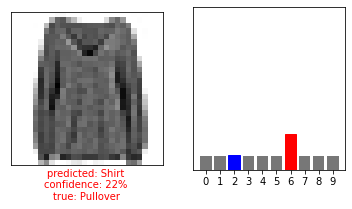

In [45]:
i = wrong_predictions[5]
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.

def display_wrong_predictions(num_rows, num_cols, wrong_predictions, predictions, test_labels):
    
    num_images = num_rows*num_cols
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))

    # we will be going over the indicies of incorrect predictions
    # we need the indicies of that list which contains the indicies of incorrect predictions, example:(16, 43, 53) -> (0, 1, 2)
    for i in wrong_predictions:
        current_index = wrong_predictions.index(i)

        # this stops the current index running out of range
        if current_index == num_images:
            break

        # this part plots the images and the corresponding probabilities assigned to which classes these images may belong to
        # the first 2 rows below are for the images and the bottom 2 rows are for the bar graphs next to them
        # remember that the functions plot_image and plot_value_array were defined by us above
        plt.subplot(num_rows, 2*num_cols, 2*current_index+1)
        plot_image(i, predictions[i], test_labels, test_images)
        plt.subplot(num_rows, 2*num_cols, 2*current_index+2)
        plot_value_array(i, predictions[i], test_labels)

    plt.tight_layout()
    plt.show()

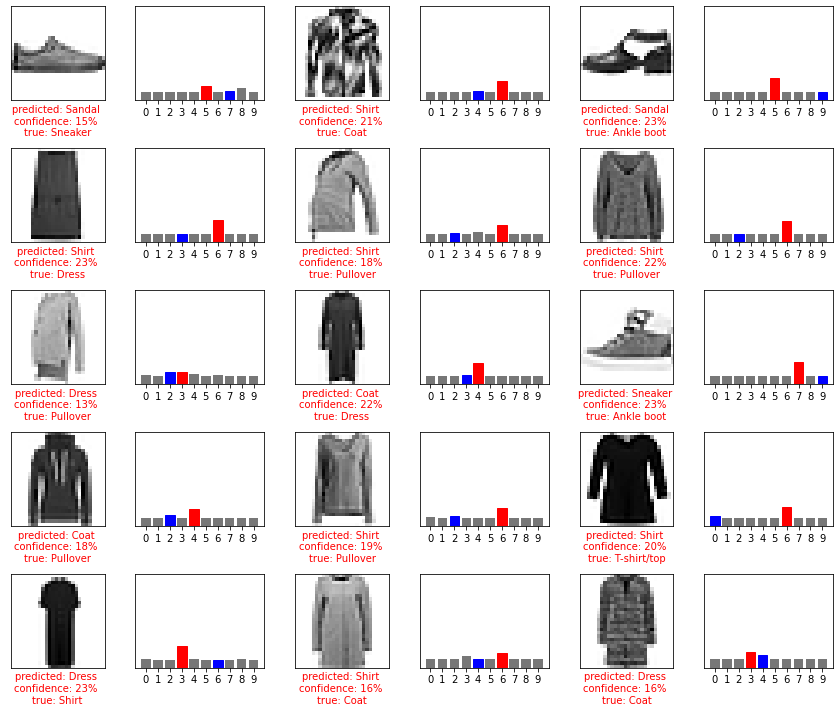

In [83]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.

num_rows = 5
num_cols = 3

display_wrong_predictions(num_rows, num_cols, wrong_predictions, predictions, test_labels)

## Different model

In [53]:
def cnn_model2():
    # create model
    model = tf.keras.Sequential()
    model.add(Conv2D(filters=32, 
                     kernel_size=5, 
                     input_shape=(28, 28, 1), 
                     activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(filters=64, 
                     kernel_size=3,  
                     activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    
    # Compile model
    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=[tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, name='sparse_categorical_crossentropy'),
                       'accuracy'])
    return model

In [54]:
model2 = cnn_model2()

In [55]:
model2.fit(train_images, train_labels, 
          validation_split = 0.2, 
          epochs=100, 
          batch_size=200,
          callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_sparse_categorical_crossentropy', patience=10)])

Epoch 1/100
240/240 [==============================] - 18s 74ms/step - loss: 0.7684 - sparse_categorical_crossentropy: 0.7684 - accuracy: 0.7225 - val_loss: 0.4811 - val_sparse_categorical_crossentropy: 0.4811 - val_accuracy: 0.8272
Epoch 2/100
240/240 [==============================] - 19s 81ms/step - loss: 0.4830 - sparse_categorical_crossentropy: 0.4830 - accuracy: 0.8267 - val_loss: 0.4092 - val_sparse_categorical_crossentropy: 0.4092 - val_accuracy: 0.8549
Epoch 3/100
240/240 [==============================] - 20s 82ms/step - loss: 0.4259 - sparse_categorical_crossentropy: 0.4259 - accuracy: 0.8490 - val_loss: 0.3866 - val_sparse_categorical_crossentropy: 0.3866 - val_accuracy: 0.8620
Epoch 4/100
240/240 [==============================] - 19s 81ms/step - loss: 0.3935 - sparse_categorical_crossentropy: 0.3935 - accuracy: 0.8597 - val_loss: 0.3545 - val_sparse_categorical_crossentropy: 0.3545 - val_accuracy: 0.8709
Epoch 5/100
240/240 [==============================] - 20s 82ms/step

240/240 [==============================] - 22s 91ms/step - loss: 0.2197 - sparse_categorical_crossentropy: 0.2197 - accuracy: 0.9195 - val_loss: 0.2341 - val_sparse_categorical_crossentropy: 0.2341 - val_accuracy: 0.9165
Epoch 37/100
240/240 [==============================] - 22s 90ms/step - loss: 0.2187 - sparse_categorical_crossentropy: 0.2187 - accuracy: 0.9203 - val_loss: 0.2300 - val_sparse_categorical_crossentropy: 0.2300 - val_accuracy: 0.9182
Epoch 38/100
240/240 [==============================] - 22s 91ms/step - loss: 0.2165 - sparse_categorical_crossentropy: 0.2165 - accuracy: 0.9204 - val_loss: 0.2475 - val_sparse_categorical_crossentropy: 0.2475 - val_accuracy: 0.9116
Epoch 39/100
240/240 [==============================] - 21s 87ms/step - loss: 0.2171 - sparse_categorical_crossentropy: 0.2171 - accuracy: 0.9204 - val_loss: 0.2346 - val_sparse_categorical_crossentropy: 0.2346 - val_accuracy: 0.9162
Epoch 40/100
240/240 [==============================] - 22s 91ms/step - loss:

### Evaluate

In [56]:
model2.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 0.2412 - sparse_categorical_crossentropy: 0.2411 - accuracy: 0.9154


[0.24115422368049622, 0.24108028411865234, 0.9154000282287598]

In [57]:
test_loss2 = model2.evaluate(test_images,  test_labels, verbose=2)[0]
test_acc2 = model2.evaluate(test_images,  test_labels, verbose=2)[2]

print('\nTest accuracy:', test_acc2)

313/313 - 1s - loss: 0.2412 - sparse_categorical_crossentropy: 0.2411 - accuracy: 0.9154
313/313 - 1s - loss: 0.2412 - sparse_categorical_crossentropy: 0.2411 - accuracy: 0.9154

Test accuracy: 0.9154000282287598


### Predict

In [59]:
probability_model2 = tf.keras.Sequential([model2, 
                                         tf.keras.layers.Softmax()])

predictions2 = probability_model2.predict(test_images)

In [84]:
wrong_predictions2 = get_wrong_predictions(len(test_labels), predictions2, test_labels)
print('Number of wrongly predicted images: ', len(wrong_predictions2))

Number of wrongly predicted images:  846


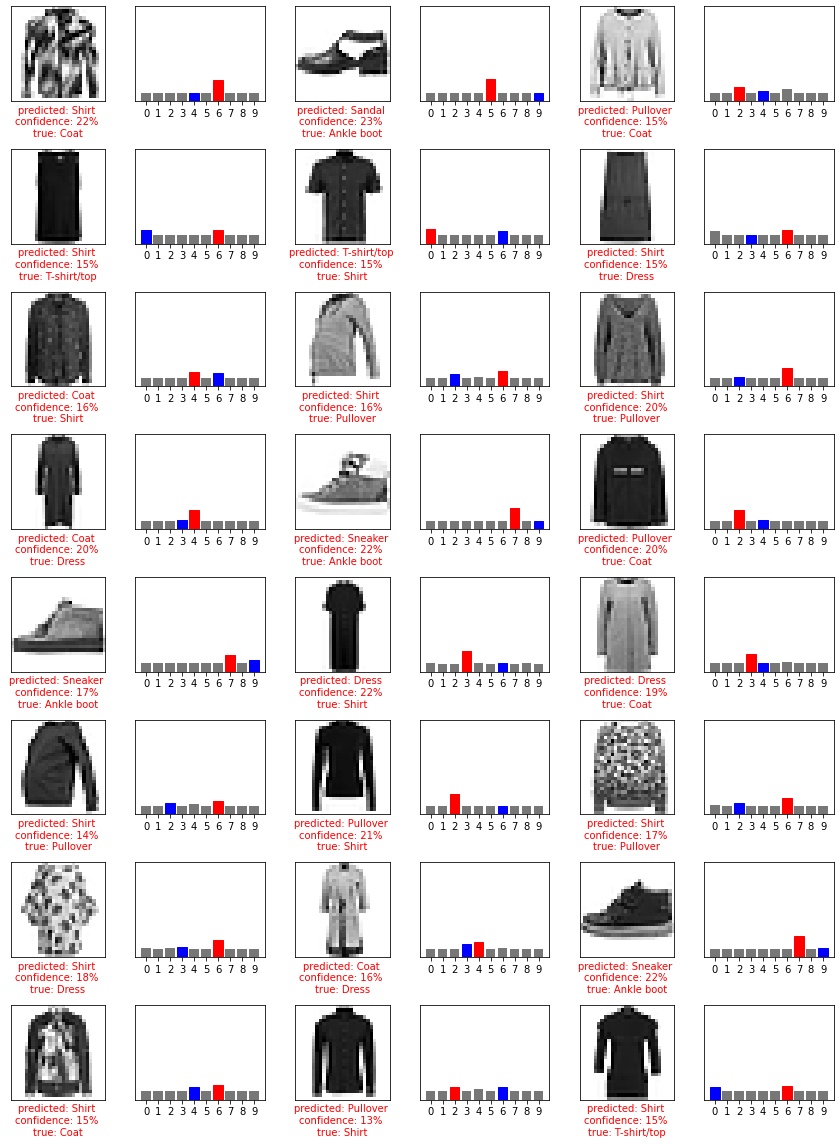

In [61]:
num_rows = 5
num_cols = 3

display_wrong_predictions(num_rows, num_cols, wrong_predictions2, predictions2, test_labels)

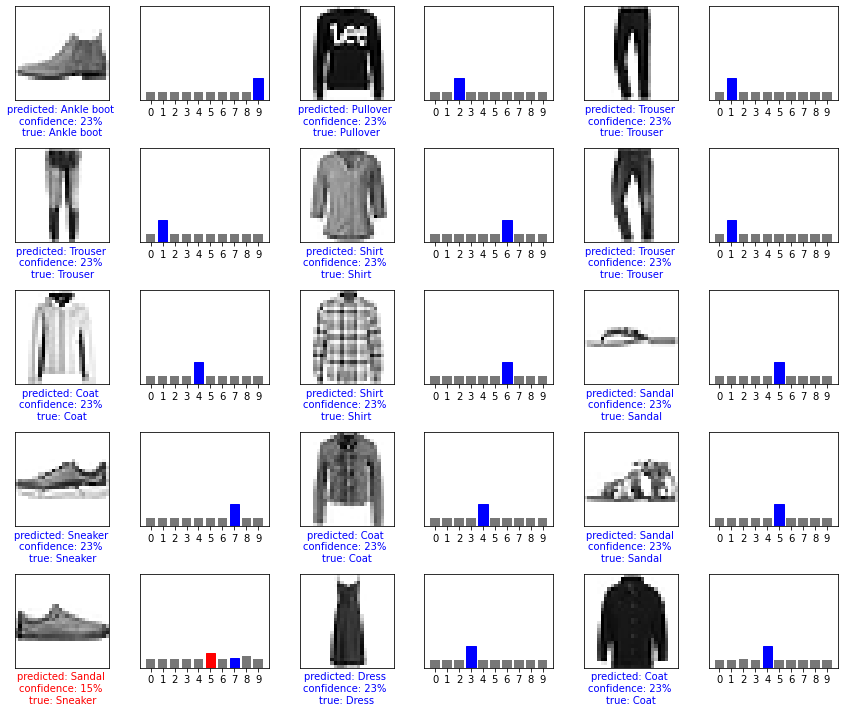

In [62]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()